步骤
1.图片数据预处理
2.加载模型
3.训练模型
4.预测图片
5.评估预测数据集
6.保存模型
7.调用加载模型

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import dlib

%matplotlib inline

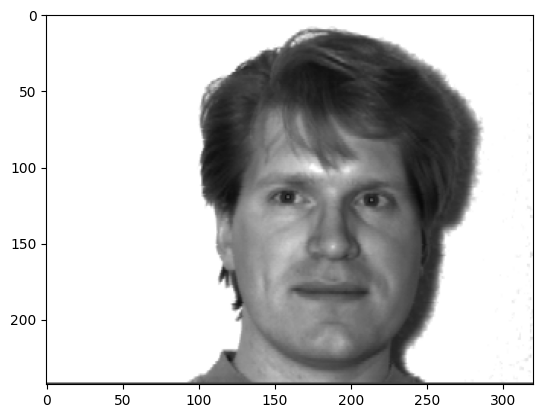

In [2]:
# 读取gif格式

img_path = './images/yalefaces/subject01.gif'
cap = cv2.VideoCapture(img_path)
ret,img = cap.read()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [3]:
#构造hog人脸检测器
hog_face_detector = dlib.get_frontal_face_detector()

In [4]:
# 图片预处理
def getFaceImgLabel(filename):
    cap = cv2.VideoCapture(filename)
    ret,img = cap.read()

    # 转灰度图
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 检测人脸
    detections = hog_face_detector(img, 1)

    if len(detections) > 0:
        # 获取人脸区域坐标
        x = detections[0].left()
        y = detections[0].top()
        r = detections[0].right()
        b = detections[0].bottom()

        # 截取人脸
        img_crop = img[y:b,x:r]

        img_crop = cv2.resize(img_crop,(120,120))
        
        # 获取人脸label
        label_id = int(filename.split('/')[-1].split('.')[0].split('subject')[-1])

        return img_crop, label_id
    else :
        return None, -1
    
# img,label = getFaceImgLabel(img_path)
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [5]:

# 遍历训练文件夹
import glob
file_list = glob.glob('./images/yalefaces/*.gif')

img_list =[]
label_list = []

for file in file_list:
    img_crop, label_id = getFaceImgLabel(file)
    
    if img_crop is not None:
        img_list.append(img_crop)
        label_list.append(label_id)

# print(len(img_list),len(label_list))

In [6]:
# 构造分类器
face_cls = cv2.face.LBPHFaceRecognizer_create()
# cv2.face.EigenFaceRecognizer_create()
# cv2.face.FisherFaceRecognizer_create()

# 后面两个方法要求人脸大小一致

In [7]:
# 训练
face_cls.train(img_list, np.array(label_list))

6


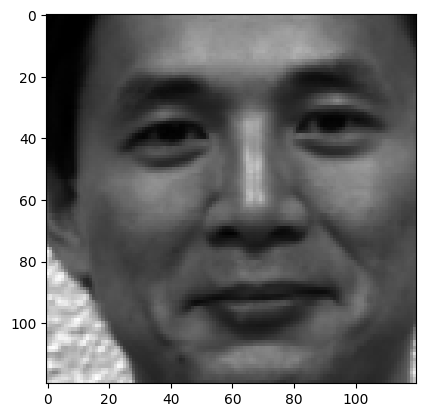

In [8]:
# 预测图片
test_file = './images/test/subject06.sad.gif'

img_crop, label_id = getFaceImgLabel(test_file)

plt.imshow(cv2.cvtColor(img_crop,cv2.COLOR_BGR2RGB))  # 显示图片
# plt.imshow(img_crop)    
if img_crop is not None:
    predict_id,distance = face_cls.predict(img_crop)
    print(predict_id)

In [9]:
# 评估模型

import glob
file_list = glob.glob('./images/test/*.gif')

true_list = []
predict_list = []

for file in file_list:
    img_crop, label_id = getFaceImgLabel(file)
    
    if img_crop is not None:
        predict_id,distance = face_cls.predict(img_crop)
        predict_list.append(predict_id)
        true_list.append(label_id)

print(predict_list)
print(true_list)


[5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10]
[5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10]


In [10]:
# 查看准确率
from sklearn.metrics import accuracy_score 
accuracy_score(true_list,predict_list)

1.0

In [11]:
# 获取融合矩阵
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(true_list,predict_list)
cm

array([[4, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0],
       [0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 0, 6]], dtype=int64)

<Axes: >

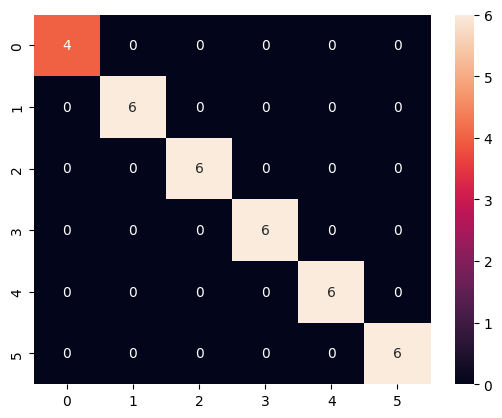

In [12]:
# 可视化
import seaborn
seaborn.heatmap(cm,annot=True)

In [13]:
# 保存模型
path = './weights/LBPG.yml'
face_cls.save(path)

# 调用模型
new_cls = cv2.face.LBPHFaceRecognizer_create()
new_cls.read(path)

In [14]:
# 预测一张图片
test_file = './images/test/subject06.sad.gif'

img_crop, label_id = getFaceImgLabel(test_file)

# plt.imshow(cv2.cvtColor(img_crop,cv2.COLOR_BGR2RGB))  # 显示图片
# plt.imshow(img_crop)    
if img_crop is not None:
    predict_id,distance = new_cls.predict(img_crop)
    print(predict_id)

6
